In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [18]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head(4)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected


In [19]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [20]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())
df.isnull().sum()


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [21]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
df.head()    

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [24]:
x = df.drop(' loan_status', axis=1)
y = df[' loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

x_train.shape
x_test.shape
y.value_counts()

 loan_status
0    2656
1    1613
Name: count, dtype: int64

In [23]:
print(df.columns.tolist())


['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [25]:
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

y_train.value_counts()
y_train_res.value_counts()

 loan_status
1    2125
0    2125
Name: count, dtype: int64

In [26]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(x_train_res,y_train_res)
y_pred_log = log_reg.predict(x_test)
classification_report(y_test, y_pred_log)

'              precision    recall  f1-score   support\n\n           0       0.84      0.86      0.85       531\n           1       0.76      0.73      0.75       323\n\n    accuracy                           0.81       854\n   macro avg       0.80      0.80      0.80       854\nweighted avg       0.81      0.81      0.81       854\n'

In [27]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(x_train_res, y_train_res)
y_pred_dt = dt.predict(x_test)
classification_report(y_test, y_pred_dt)

'              precision    recall  f1-score   support\n\n           0       1.00      0.96      0.98       531\n           1       0.94      0.99      0.97       323\n\n    accuracy                           0.98       854\n   macro avg       0.97      0.98      0.97       854\nweighted avg       0.98      0.98      0.98       854\n'

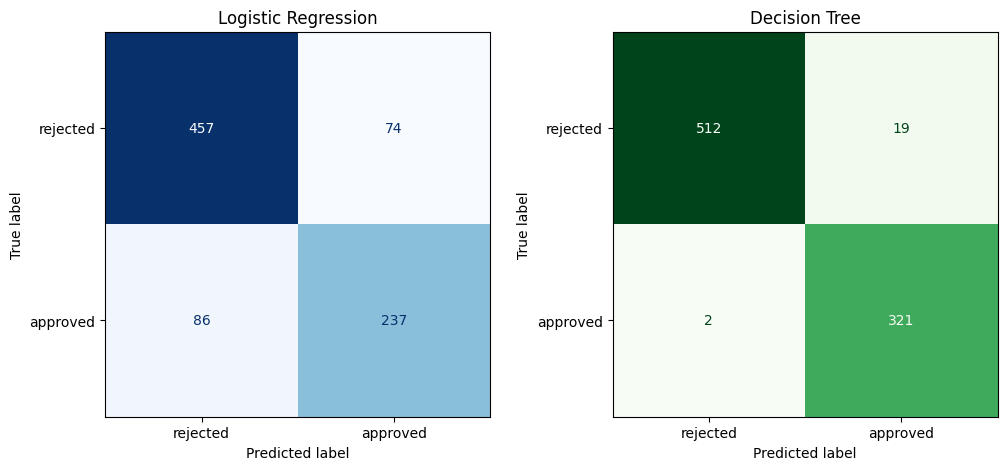

In [28]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
cm1 = confusion_matrix(y_test,y_pred_log)
disp1 = ConfusionMatrixDisplay(cm1, display_labels=['rejected', 'approved'])
disp1.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Logistic Regression')

cm2 = confusion_matrix(y_test,y_pred_dt)
disp2 = ConfusionMatrixDisplay(cm2, display_labels=['rejected', 'approved'])
disp2.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title('Decision Tree')

plt.show()